# EDA Fire resistance

## Library loading, settings and dataset load

Hide warnings 

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

Main libraries load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Additional libraries

In [3]:
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr

Set matplotlib parameters

In [4]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

Load Fire Resistance dataset

In [5]:
path = '/Users/manolo/Documents/Docencia/Tesis Doctorales/Elena Albeira Guirado Lucinio/Resistencia fuego/Datasets/'

In [6]:
df = pd.read_excel(path + 'FR_augmented.xlsx')

In [7]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag
0,2.0,35.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,15.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.5,26.0,99.5,NaN,NaN,NaN,0.5,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.5,15.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,110.7,30.0,60.0,9.5,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset exploring and cleaning

Checking duplicates

In [8]:
len(df) - len(df.drop_duplicates())

0

No duplicates

Dataset variable info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Thickness                        134 non-null    float64
 1   t180                             134 non-null    float64
 2   Gypsum                           121 non-null    float64
 3   Lomas ash                        23 non-null     float64
 4   Vermiculite                      65 non-null     float64
 5   Fiberglass                       108 non-null    float64
 6   PP Fiber                         12 non-null     float64
 7   Fireproof cardboard              10 non-null     float64
 8   Carbonated ash                   9 non-null      float64
 9   Rice husk ash                    9 non-null      float64
 10  GSA ash                          14 non-null     float64
 11  Ash                              32 non-null     float64
 12  Cyclon ash            

Fire-resistant cardboard is not a float variable but categorical (yes = 1, no = 0). This must be solved later

Exploring missing values

In [10]:
for name in df.columns:
    column = df[name]
    NaN = sum(column.isnull())
    print ('Number of null values in the column', name, 'is: ', NaN)

Number of null values in the column Thickness is:  0
Number of null values in the column t180 is:  0
Number of null values in the column Gypsum is:  13
Number of null values in the column Lomas ash is:  111
Number of null values in the column Vermiculite is:  69
Number of null values in the column Fiberglass is:  26
Number of null values in the column PP Fiber is:  122
Number of null values in the column Fireproof cardboard is:  124
Number of null values in the column Carbonated ash is:  125
Number of null values in the column Rice husk ash is:  125
Number of null values in the column GSA ash is:  120
Number of null values in the column Ash is:  102
Number of null values in the column Cyclon ash is:  126
Number of null values in the column FGD gypsum Compostilla is:  129
Number of null values in the column Sea limestone is:  129
Number of null values in the column Portland concrete is:  88
Number of null values in the column Silica sand is:  108
Number of null values in the column Coar

<Axes: >

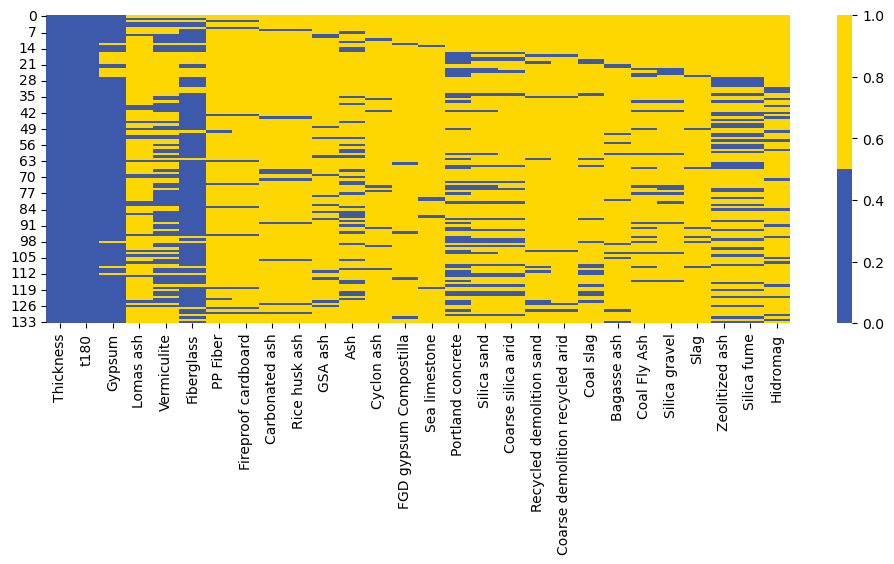

In [11]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.heatmap(df[df.columns].isnull(), cmap=sns.color_palette(['#3D59AB', '#FFD700']))

Yellow = 'missing'; Blue = 'no missing'.

The missing values correspond to zero, as they represent compositions

Filling NaN with 0

In [12]:
df.fillna(value = 0, inplace = True)

In [13]:
df['Fireproof cardboard'] = pd.Categorical(df['Fireproof cardboard'])

Changing Fire-resistant cardboard to categorical

In [14]:
df.head()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Fireproof cardboard,Carbonated ash,Rice husk ash,...,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag
0,2.0,35.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.5,26.0,99.5,0.0,0.0,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,15.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,110.7,30.0,60.0,9.5,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Exploratory data analysis (EDA)

Preliminary statistics analysis

In [15]:
df.describe()

,Thickness,t180,Gypsum,Lomas ash,Vermiculite,Fiberglass,PP Fiber,Carbonated ash,Rice husk ash,GSA ash,...,Recycled demolition sand,Coarse demolition recycled arid,Coal slag,Bagasse ash,Coal Fly Ash,Silica gravel,Slag,Zeolitized ash,Silica fume,Hidromag
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.00000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,2.087036,32.466513,35.312428,4.255659,2.723624,0.299844,0.030998,2.158751,0.031286,3.230347,...,2.771612,0.822711,1.52922,2.662120,3.226767,1.826304,0.937565,10.752926,1.036913,1.426297
std,0.396889,14.606822,26.659374,13.397795,3.598628,0.228252,0.106886,10.561688,0.153068,11.132254,...,10.368709,4.574757,5.13481,9.832831,10.309211,6.394728,4.445540,19.909990,2.042941,4.289290
min,1.300000,14.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,23.765396,18.748487,0.000000,0.000000,0.067970,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,30.397446,30.000000,0.000000,0.000000,0.330997,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,35.365415,45.786807,0.000000,5.090236,0.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,11.183323,0.956638,0.000000
max,4.000000,110.700000,100.000000,60.000000,9.500000,1.000000,0.500000,69.000000,1.000000,60.000000,...,50.000000,30.000000,30.00000,60.000000,50.000000,30.000000,30.000000,70.000000,9.500000,30.000000


<Axes: >

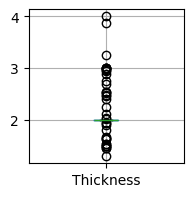

In [16]:
fig, ax = plt.subplots(figsize=(2, 2))
df.boxplot(column = ['Thickness'])

<Axes: >

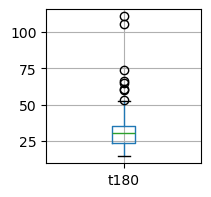

In [17]:
fig, ax = plt.subplots(figsize=(2, 2))
df.boxplot(column = ['t180'])

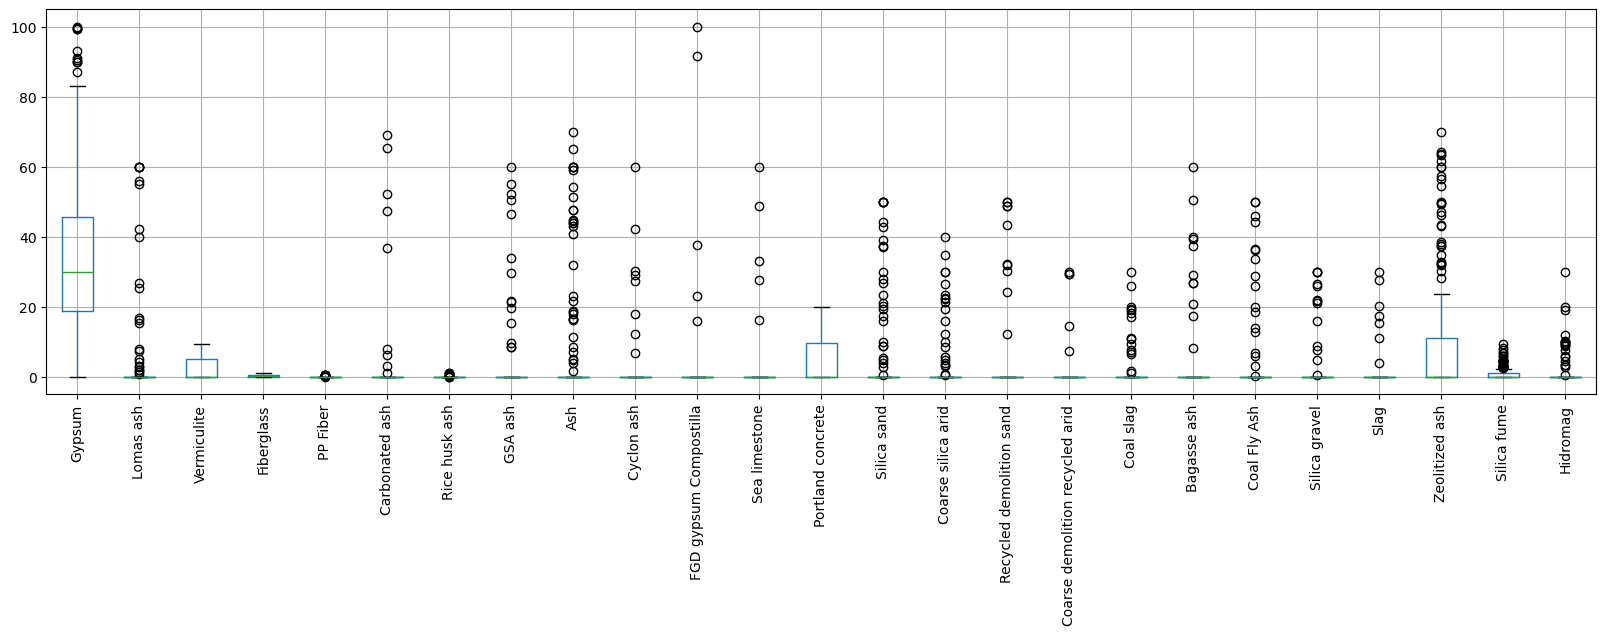

In [18]:
comp_list = [col for col in df.columns if col not in ['Thickness', 't180', 'Fireproof cardboard']]
fig, ax = plt.subplots(figsize=(20, 5))
df.boxplot(column=comp_list, ax=ax)
ax.tick_params(axis='x', rotation=90)
plt.show()

Univariate Histograms

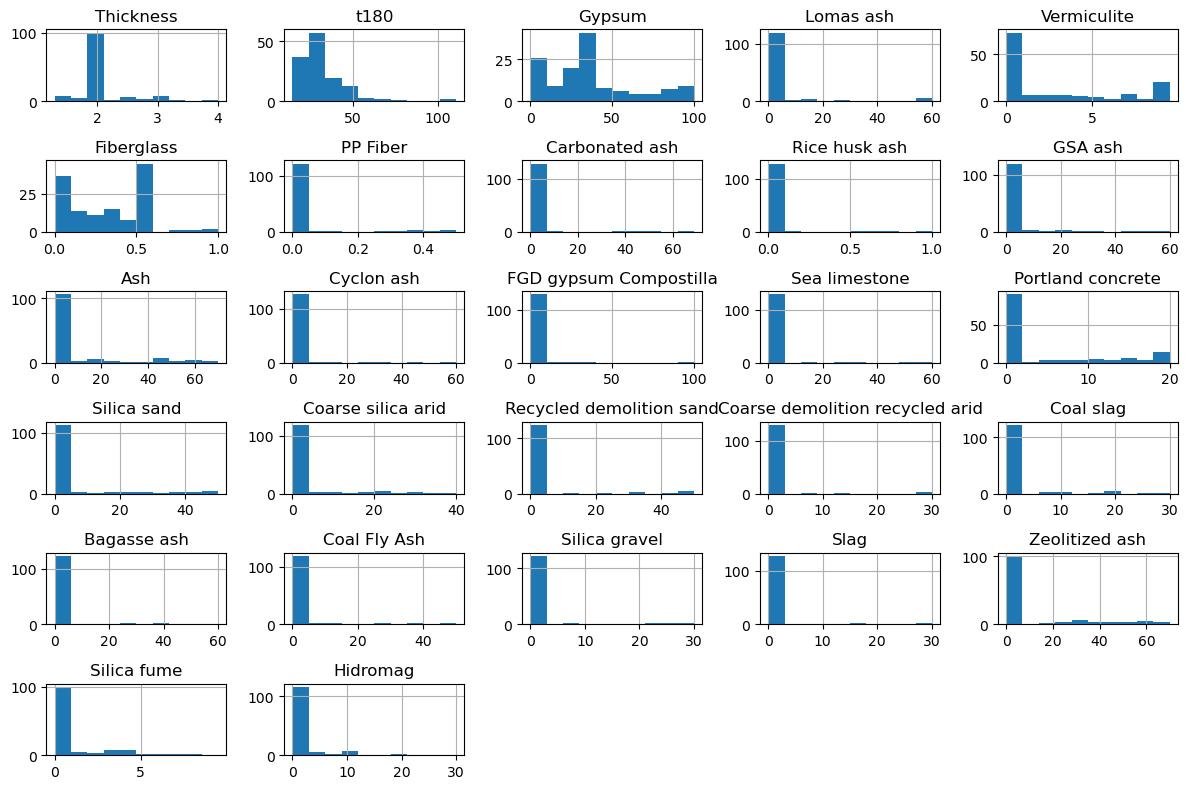

In [19]:
df.hist()
plt.tight_layout()
plt.show()

Density Plots

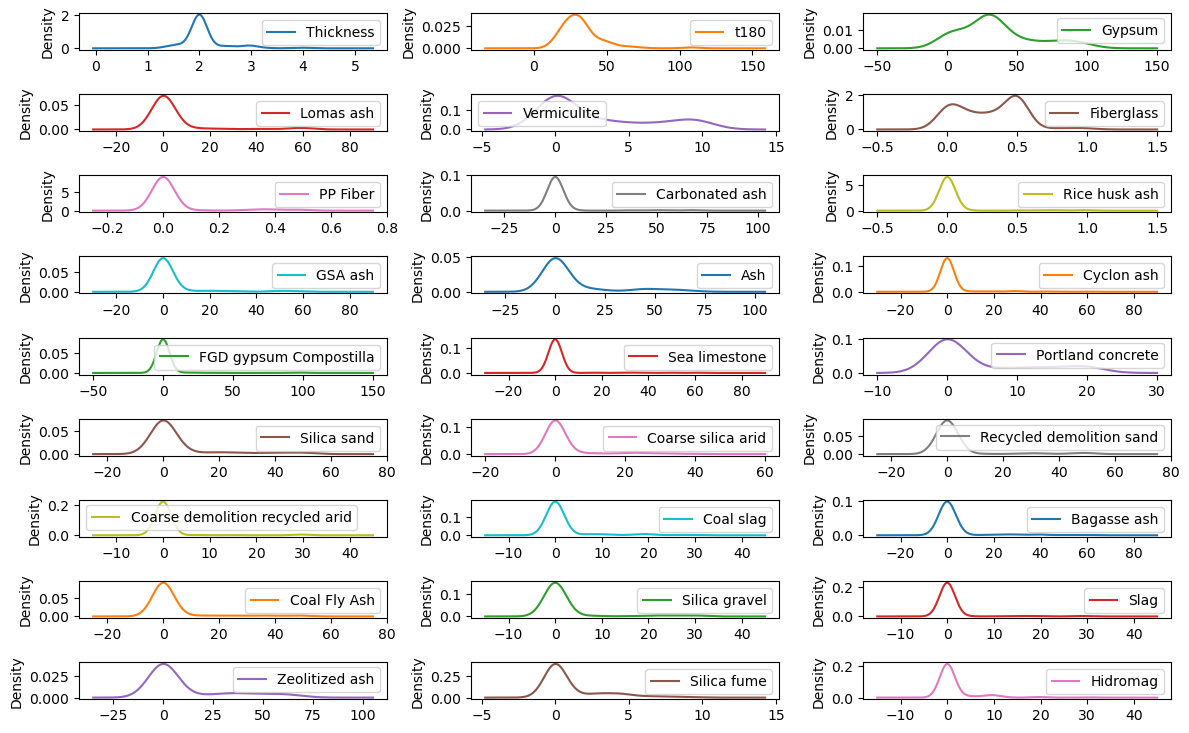

In [20]:
df.plot(kind='density', subplots=True, layout=(10,3), sharex=False)
plt.tight_layout()
plt.show()

Scatterplot matrix

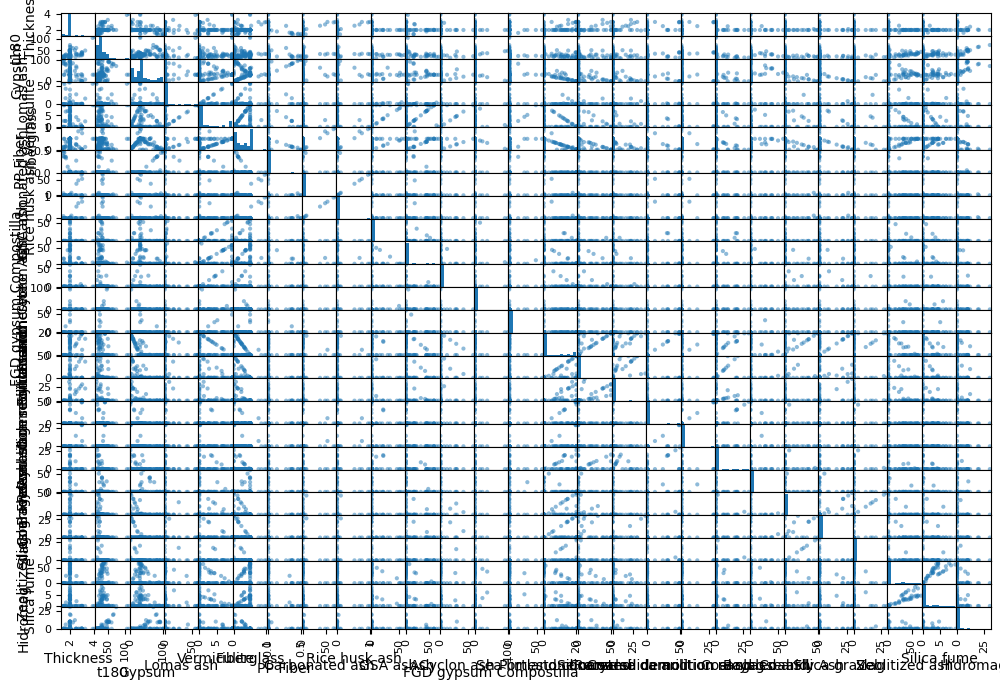

In [21]:
scatter_matrix(df)
plt.show()

Pairplot matrix

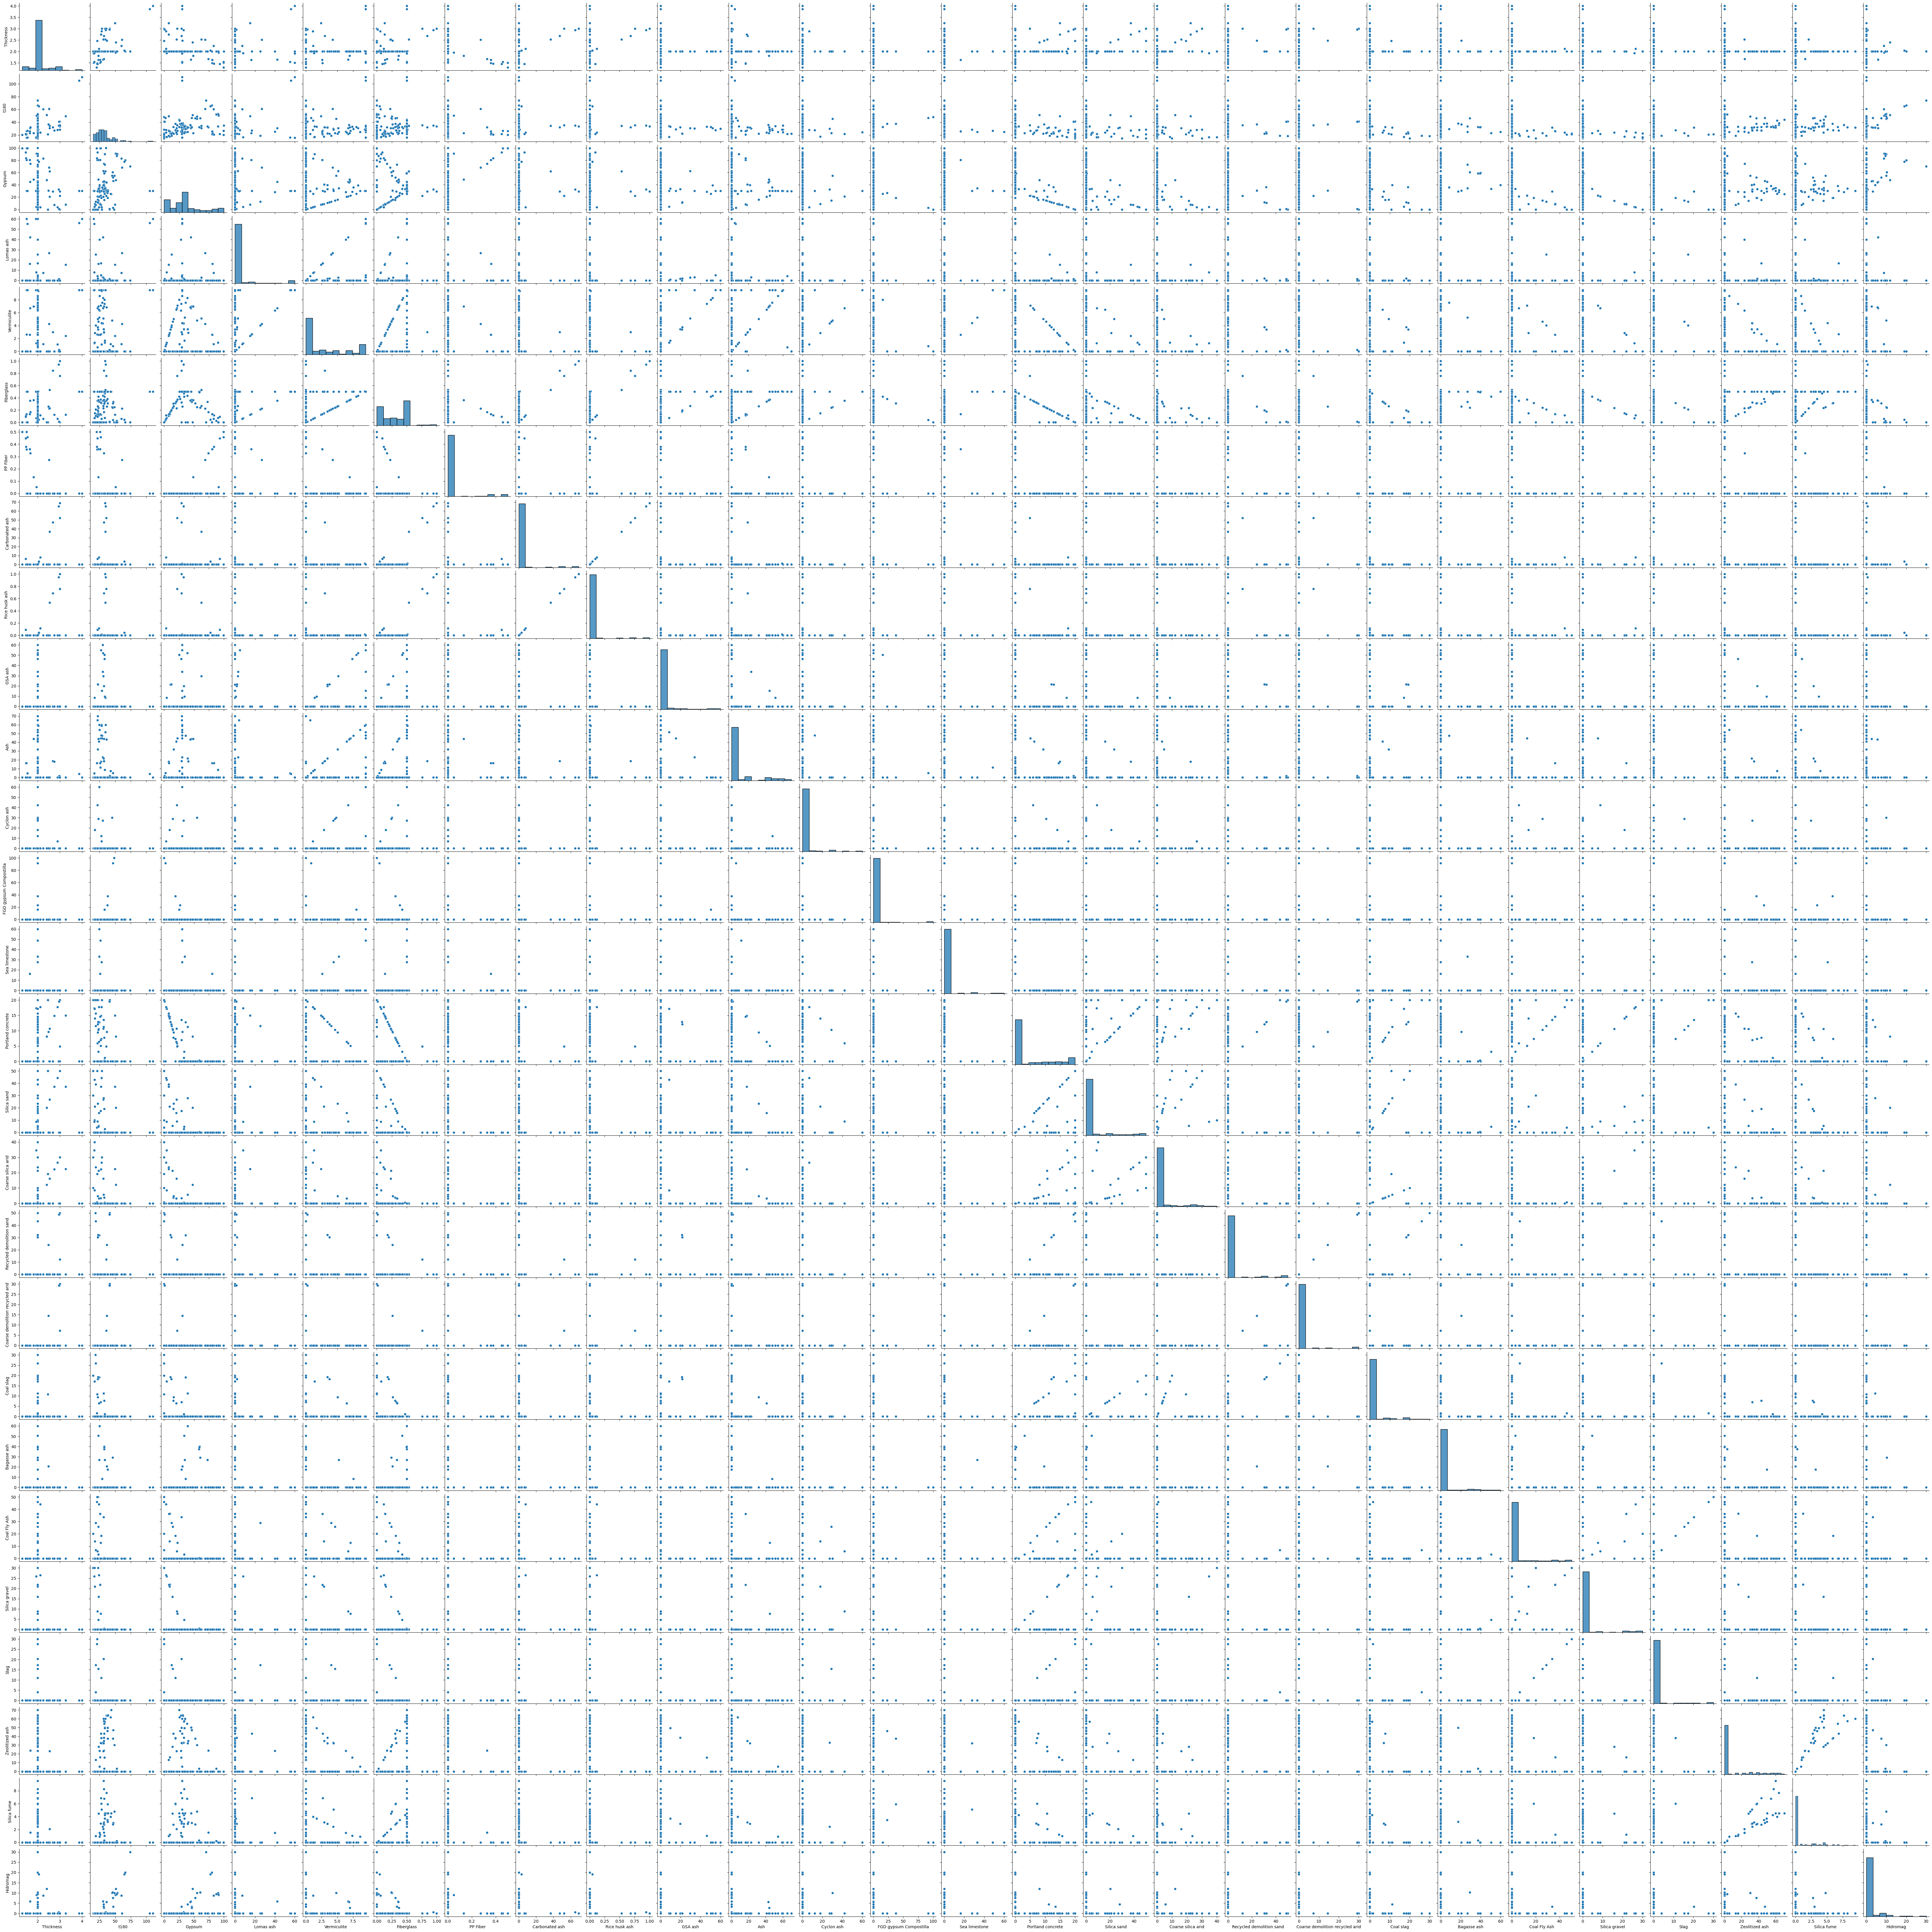

In [22]:
sns.pairplot(df)
plt.show()

Correlation diagram

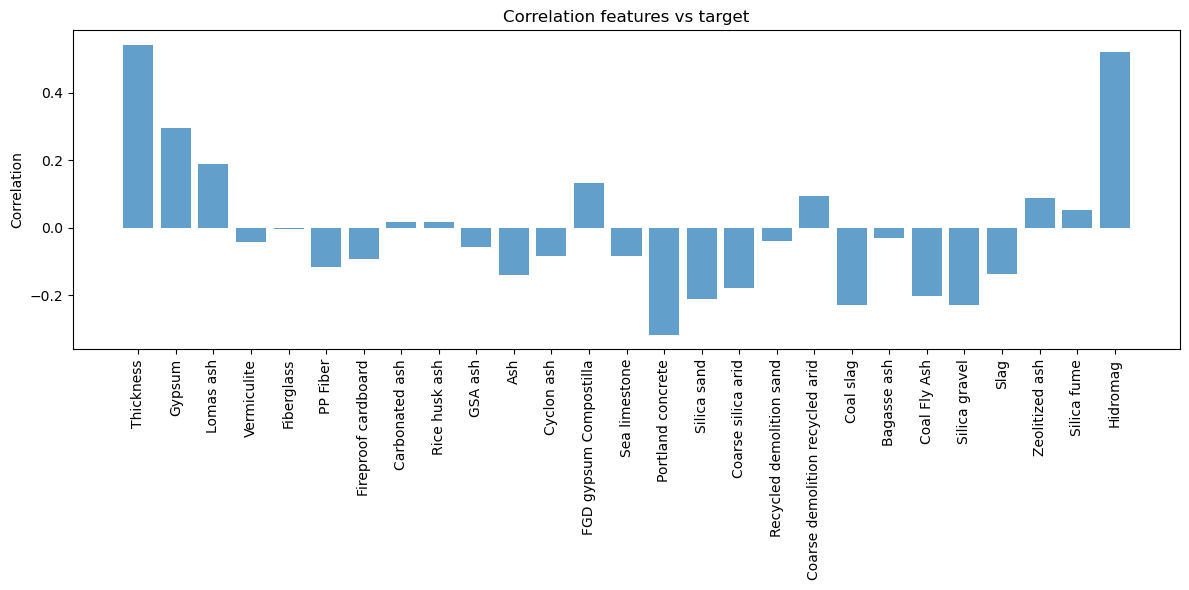

In [23]:
features = [col for col in df.columns if col != 't180']

corr = [pearsonr(df[feature], df['t180'])[0] for feature in features]

y_pos = np.arange(len(features))
plt.figure(figsize=(12, 6)) 
plt.bar(y_pos, corr, align='center', alpha=0.7)
plt.xticks(y_pos, features, rotation=90)  
plt.ylabel('Correlation')
plt.title('Correlation features vs target')

plt.tight_layout()
plt.show()

Heatmap

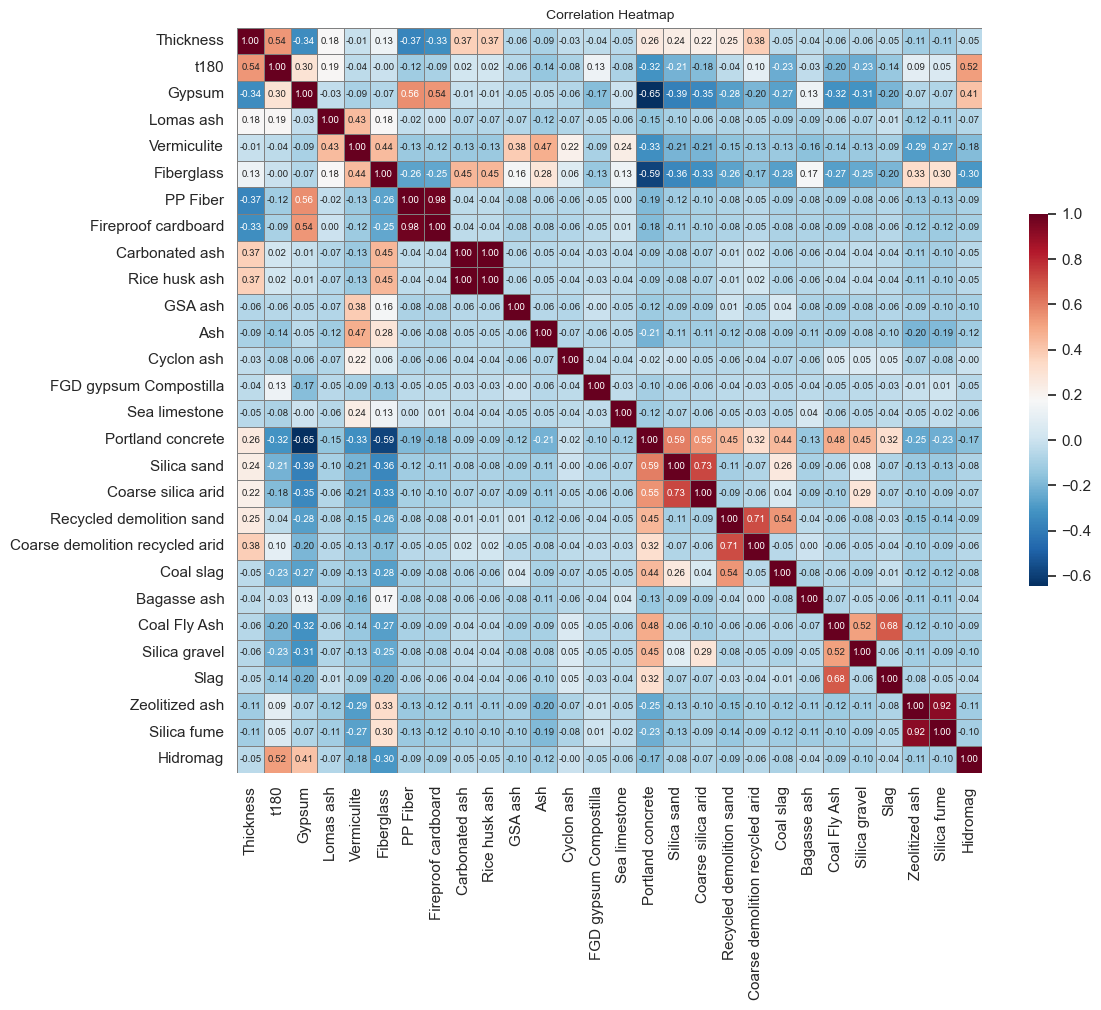

In [24]:
sns.set(style='white', palette='muted')

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='RdBu_r', square=True, fmt='.2f', cbar_kws={'shrink': 0.5}, 
            annot_kws={'size': 7}, linewidths=0.5, linecolor='gray')

plt.title('Correlation Heatmap', fontsize=10)
plt.tight_layout()
plt.show()

## Dataset exportation 

Exporting to xlsx file for further analysis 

In [25]:
df.to_excel(path + 'FR_EDA_augmented.xlsx', index=False)